# **Project Name** - Iris Flower Classification

#**Project Type**- Classification
#**Industry** - Afame Technology
#**Contribution** - Individual
#**Member Name** - Akshata Biradar


# **Project Summary**

#Project Description:

The Iris Flower Classification project focuses on developing a machine learning model to classify iris flowers into their respective species based on specific measurements. Iris flowers are classified into three species: setosa, versicolor, and virginica, each of which exhibits distinct characteristics in terms of measurements.

# Objective:
The objective of this project is to train a machine learning model that can accurately classify Iris flowers into their respective species based on their measurements.

#Project Details:

Iris Species: The dataset consists of iris flowers, specifically from the species setosa, versicolor, and virginica.
Key Measurements: The essential characteristics used for classification include sepal length, sepal width, petal length, and petal width.
Machine Learning Model: The project involves the creation and training of a machine learning model to accurately classify iris flowers based on their measurements.
This project's significance lies in its potential to streamline and automate the classification of iris species, which can have broader applications in botany, horticulture, and environmental monitoring.

# Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
!pip install requests

In [ ]:
import requests

In [ ]:
url = "https://raw.githubusercontent.com/akshatabiradars/Afame-Technologies/main/IRIS%20Flower.csv"
response = requests.get(url)

In [ ]:
with open("iris.csv", "wb") as f:
    f.write(response.content)

In [ ]:
import pandas as pd

df = pd.read_csv("iris.csv")

# Dataset First View

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


# Dataset Information

In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


# Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# What did i know about the dataset?

*   The Iris dataset consists of length and width mesurements of sepal and petal
for different species in centimeter.
*   There are 150 rows and 6 columns provided in the data.
*  No duplicate values exist.
*  No Null values exist.










# Understanding The Variables

In [ ]:
# Dataset Columns
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:

# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


# Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in sepal_length is 35
No. of unique values in sepal_width is 23
No. of unique values in petal_length is 43
No. of unique values in petal_width is 22
No. of unique values in species is 3


# Data Wrangling

In [ ]:
# We don't need the 1st column so let's drop that
data=df.iloc[:,1:]

In [ ]:
# New updated dataset
data.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


# What all manipulations have i done?
Only drop the first column of the dataset.

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

# Chart - 1 : Distribution of Numerical Variables

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

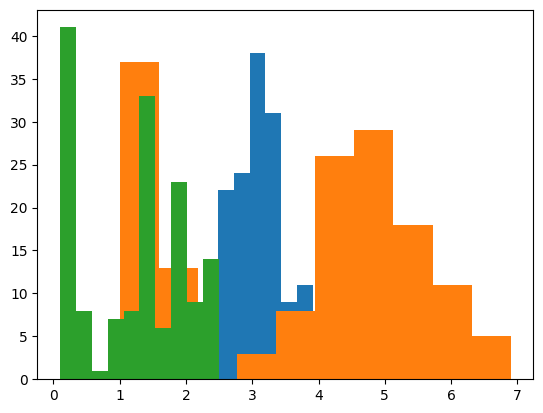

In [ ]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.hist(data['sepal_width'])
plt.hist(data['petal_length'])
plt.hist(data['petal_width'])

# petal Length vs petal Width

In [ ]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
# Print the columns of the data DataFrame.
print(data.columns)

# Print the species list.
print(species)

# Print the value of the i variable.
print(i)

Index(['sepal_width', 'petal_length', 'petal_width', 'species'], dtype='object')
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
species


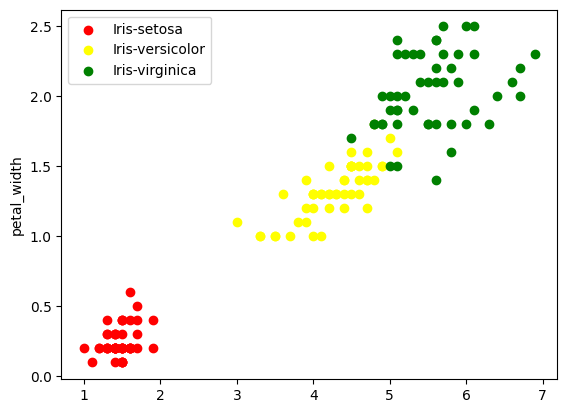

In [ ]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for petal length vs petal width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter( x['petal_length'],x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.ylabel('petal_length')
plt.ylabel('petal_width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

# sepal width vs petal width

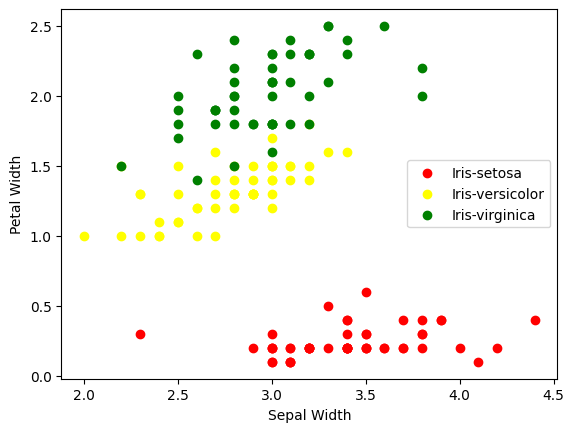

In [ ]:
# Chart - 3 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

# sepal width vs petal length

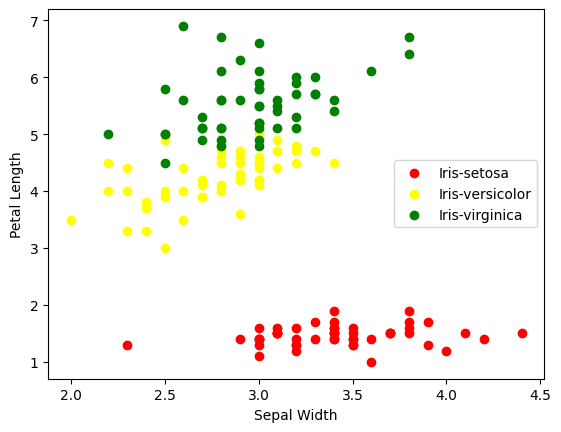

In [ ]:
# Chart - 4 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal length for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_width'], x['petal_length'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

# Correlation Heatmap

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
data.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.dtypes

sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
data = data.apply(pd.to_numeric, errors='ignore')

<Axes: >

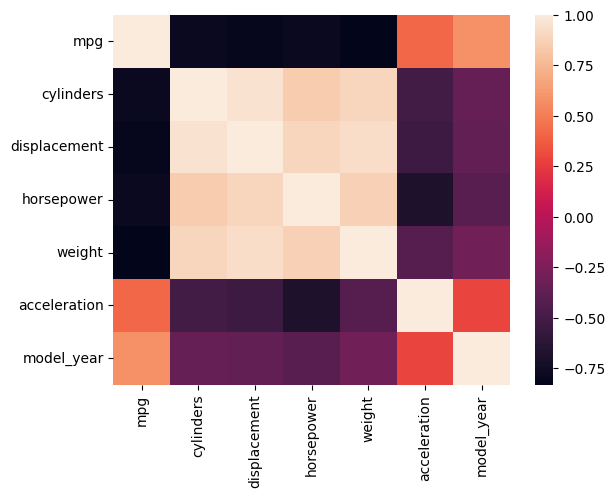

In [ ]:
import seaborn as sns
%matplotlib inline

# load the Auto dataset
auto_df = sns.load_dataset('mpg')

# calculate the correlation matrix on the numeric columns
corr = auto_df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

# Feature Engineering & Data Pre-processing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.DataFrame({'species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})

In [ ]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [ ]:
unique_species = data['species'].unique()
print("Encoded Species Values:")
print(unique_species)

Encoded Species Values:
[0 1 2]


# Data Scaling

In [ ]:
# Defining the X and y
x=data.drop(columns=['species'], axis=1)
y=data['species']

# Data Splitting

In [ ]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [ ]:

# Checking the train distribution of dependent variable
y_train.value_counts()

species
2    1
1    1
Name: count, dtype: int64

# ML Model Implementation

In [ ]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

# ML Model - 1 : Logistic regression

In [ ]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model

# Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[14  0  0]
 [ 0 16  2]
 [ 0  2 16]]


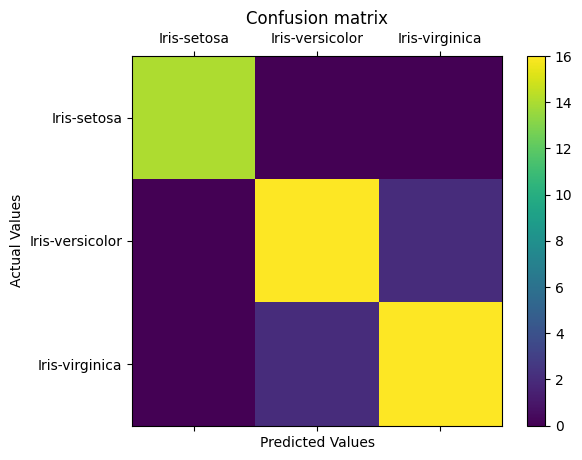

In [ ]:
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
url = "https://raw.githubusercontent.com/akshatabiradars/Afame-Technologies/main/IRIS%20Flower.csv"
df = pd.read_csv(url)
# df = df.values
x = df.iloc[:,0:4]
y = df.iloc[:,4]
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#Split data into train and test set.
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#Train Model
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

#Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
#import modules
import warnings
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
iris = datasets.load_iris()
# # Create feature matrix
x = iris.data
# Create target vector
y = iris.target
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#cross-validation settings
kfold = model_selection.KFold(n_splits=10, shuffle=True)
#Model instance
model = LogisticRegression()
#Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

#split data
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#fit model
model.fit(x_train, y_train)
#accuracy on test set
result = model.score(x_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy -val set: 96.67% (0.04)
Accuracy - test set: 92.00%


In [ ]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/akshatabiradars/Afame-Technologies/main/IRIS%20Flower.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
x = dat[:,:-1]
y = dat[:,-1]
test_size = 0.33
seed = 7

model = LogisticRegression()
#split data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=test_size, random_state=seed)
model.fit(x_train, y_train)
precision = precision_score(y_test, pred, average='micro') # Changed the average parameter to 'micro'
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred, average='micro')
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, pred, average='micro')
print('F1 score: %f' % f1)

Precision: 0.920000
Recall: 0.920000
F1 score: 0.920000


#  Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


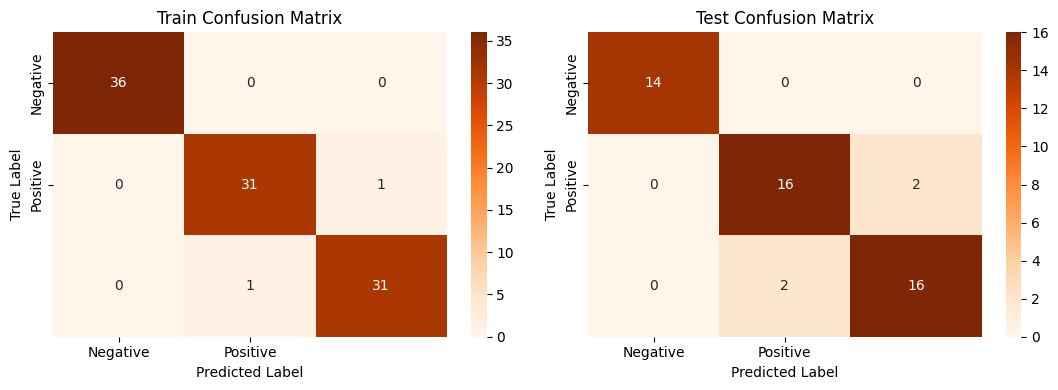


Train Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |     36    |
| Iris-versicolor |    0.96875  | 0.96875  |   0.96875  |     32    |
| Iris-virginica  |    0.96875  | 0.96875  |   0.96875  |     32    |
| accuracy        |    0.98     | 0.98     |   0.98     |      0.98 |
| macro avg       |    0.979167 | 0.979167 |   0.979167 |    100    |
| weighted avg    |    0.98     | 0.98     |   0.98     |    100    |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |     14    |
| Iris-versicolor |    0.888889 | 0.888889 |   0.888889 |     18    |
| Iris-virginica  |    0.888889 | 0.888889 |   0.888889 |     18    |
| accuracy        |    0.92    

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

# ML Model 2 : Decision Tree

In [ ]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


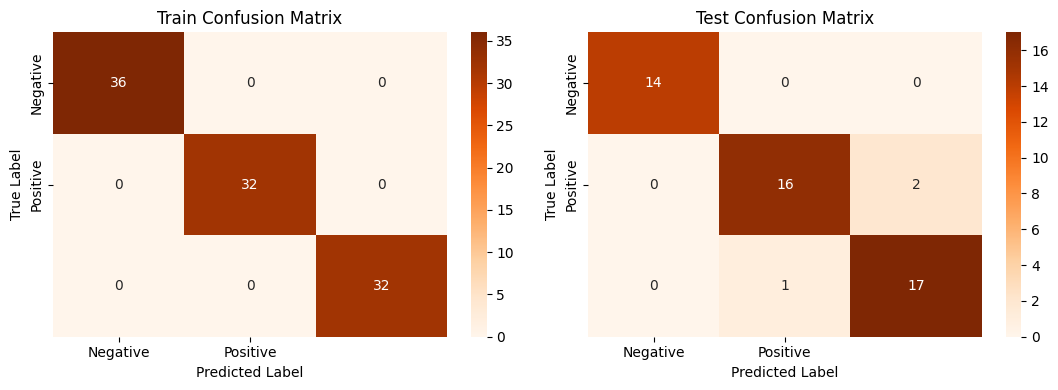


Train Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |           1 |        1 |          1 |        36 |
| Iris-versicolor |           1 |        1 |          1 |        32 |
| Iris-virginica  |           1 |        1 |          1 |        32 |
| accuracy        |           1 |        1 |          1 |         1 |
| macro avg       |           1 |        1 |          1 |       100 |
| weighted avg    |           1 |        1 |          1 |       100 |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |     14    |
| Iris-versicolor |    0.941176 | 0.888889 |   0.914286 |     18    |
| Iris-virginica  |    0.894737 | 0.944444 |   0.918919 |     18    |
| accuracy        |    0.94    

In [ ]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

# Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [ ]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


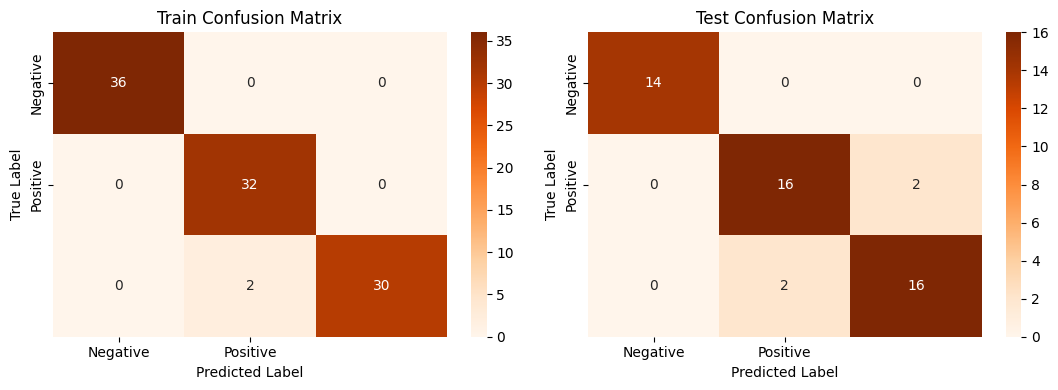


Train Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |     36    |
| Iris-versicolor |    0.941176 | 1        |   0.969697 |     32    |
| Iris-virginica  |    1        | 0.9375   |   0.967742 |     32    |
| accuracy        |    0.98     | 0.98     |   0.98     |      0.98 |
| macro avg       |    0.980392 | 0.979167 |   0.979146 |    100    |
| weighted avg    |    0.981176 | 0.98     |   0.97998  |    100    |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |     14    |
| Iris-versicolor |    0.888889 | 0.888889 |   0.888889 |     18    |
| Iris-virginica  |    0.888889 | 0.888889 |   0.888889 |     18    |
| accuracy        |    0.92    

In [ ]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

# ML Model - 3 : Random Forest

In [ ]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)
# Model is trained (fit) and predicted in the evaluate model

# Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


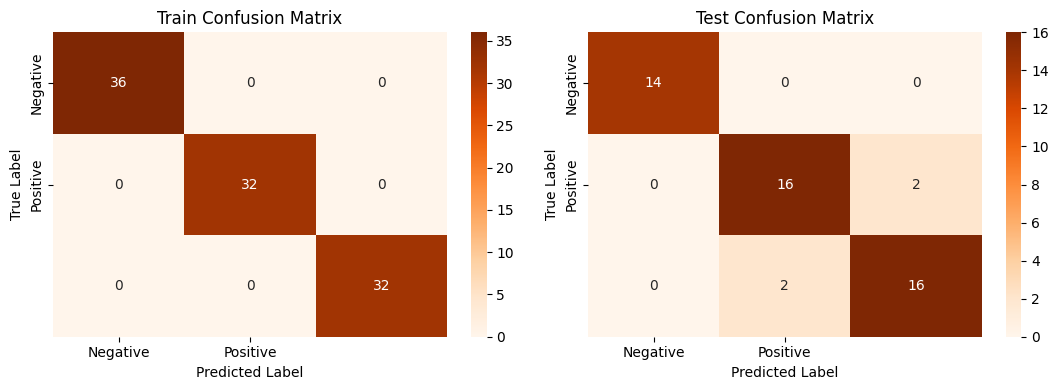


Train Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |           1 |        1 |          1 |        36 |
| Iris-versicolor |           1 |        1 |          1 |        32 |
| Iris-virginica  |           1 |        1 |          1 |        32 |
| accuracy        |           1 |        1 |          1 |         1 |
| macro avg       |           1 |        1 |          1 |       100 |
| weighted avg    |           1 |        1 |          1 |       100 |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |     14    |
| Iris-versicolor |    0.888889 | 0.888889 |   0.888889 |     18    |
| Iris-virginica  |    0.888889 | 0.888889 |   0.888889 |     18    |
| accuracy        |    0.92    

In [ ]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)


# Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}
# Initialize the model
rf = RandomForestClassifier(random_state=0)
# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)
# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)
# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)
# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 14}
